In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler, OrdinalEncoder


In [3]:
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
from google.colab import files
uploaded = files.upload()


Saving merge_data_final.xlsx to merge_data_final.xlsx


In [35]:
# Sau khi tải lên, bạn có thể đọc file Excel như sau:
import pandas as pd
df = pd.read_excel('merge_data_final.xlsx')
df.head()

,TienSuYKhoa,ChamNoi,CungNhac,CoLap,ChoiGiaVo,HanhViLapLai,KyNangGiaoTiepSom,ChoiLuanPhien,BatChuoc,SaiViec,PhanUngTenGoi,ChiTro,ChuYLienKet,TiepXucMat,TargetBinary
0,0,1,0,1,0,0,1,1,0,1,0,0,1,1,1
1,0,1,0,1,0,1,1,0,0,1,0,1,1,1,1
2,0,1,0,0,1,0,1,0,0,0,1,1,1,1,1
3,0,0,0,0,1,1,1,0,1,0,1,1,1,1,1
4,0,1,0,0,1,0,1,0,1,0,1,1,1,1,1


In [6]:
# Liệt kê tên các cột
print(df.columns.tolist())
rows, cols = df.shape
print(f"Số hàng: {rows}, Số cột: {cols}")

['TienSuYKhoa', 'ChamNoi', 'CungNhac', 'CoLap', 'ChoiGiaVo', 'HanhViLapLai', 'KyNangGiaoTiepSom', 'ChoiLuanPhien', 'BatChuoc', 'SaiViec', 'PhanUngTenGoi', 'ChiTro', 'ChuYLienKet', 'TiepXucMat', 'TargetBinary']
Số hàng: 817, Số cột: 15


In [7]:
for i, col in enumerate(df.columns):
    print(f"Vị trí {i}: {col}")

Vị trí 0: TienSuYKhoa
Vị trí 1: ChamNoi
Vị trí 2: CungNhac
Vị trí 3: CoLap
Vị trí 4: ChoiGiaVo
Vị trí 5: HanhViLapLai
Vị trí 6: KyNangGiaoTiepSom
Vị trí 7: ChoiLuanPhien
Vị trí 8: BatChuoc
Vị trí 9: SaiViec
Vị trí 10: PhanUngTenGoi
Vị trí 11: ChiTro
Vị trí 12: ChuYLienKet
Vị trí 13: TiepXucMat
Vị trí 14: TargetBinary


In [36]:
X = df.iloc[:, 0:14]      # lấy từ cột 0 đến 13 (14 đặc trưng)
y = df.iloc[:, 14]        # lấy cột TargetBinary (vị trí 14)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.5,
    random_state=42,
    shuffle=True,      # Có thể bỏ vì mặc định đã là True
    stratify=y         # Rất quan trọng trong bài toán classification
)

print(f"Kích thước tập train: {len(X_train)} dòng")
print(f"Kích thước tập test: {len(X_test)} dòng")

Kích thước tập train: 408 dòng
Kích thước tập test: 409 dòng


In [38]:
xgb_train = xgb.DMatrix(X_train, y_train, enable_categorical=True)
xgb_test = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [11]:
# Không chạy lại
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Thiết lập lưới tham số cần tìm
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5, 8],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1],
    'n_estimators': [50, 100],
    'scale_pos_weight': [1]  # bạn có thể thêm giá trị khác nếu dữ liệu lệch lớp
}

# Tạo mô hình XGBoost
xgb_clf = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Thiết lập GridSearchCV
grid = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Huấn luyện tìm tham số tốt nhất
grid.fit(X_train, y_train)

# In ra kết quả
print("Thông số tốt nhất:", grid.best_params_)


Fitting 5 folds for each of 768 candidates, totalling 3840 fits


KeyboardInterrupt: 

In [39]:
# Giả sử bạn đã có X_train, y_train
# Bước 2: Tạo DMatrix cho XGBoost
xgb_train = xgb.DMatrix(X_train, label=y_train)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'learning_rate': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0,
    'scale_pos_weight': 1,  # bạn có thể tính tự động nếu lệch lớp
    'seed': 42,
    'subsample': 0.8,
}
# Bước 4: Huấn luyện mô hình
n = 100
model = xgb.train(params=params, dtrain=xgb_train, num_boost_round=n)

In [40]:
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd
import xgboost as xgb

# 1. Tạo DMatrix và dự đoán xác suất
xgb_test = xgb.DMatrix(X_test)
y_proba = model.predict(xgb_test)  # xác suất dự đoán lớp 1

# 2. Áp ngưỡng 0.5 → nhãn dự đoán
y_pred = (y_proba >= 0.5).astype(int)

# 3. Tính các độ đo
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# 4. Tạo bảng kết quả
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-score', 'ROC-AUC'],
    'Score': [precision, recall, f1, roc_auc]
})
metrics_df['Score'] = metrics_df['Score'].round(3)

# 5. Hiển thị kết quả
print("=== Evaluation Metrics (Chạy đơn) ===")
print(metrics_df)

=== Evaluation Metrics (Chạy đơn) ===
      Metric  Score
0  Precision  0.931
1     Recall  0.912
2   F1-score  0.921
3    ROC-AUC  0.933


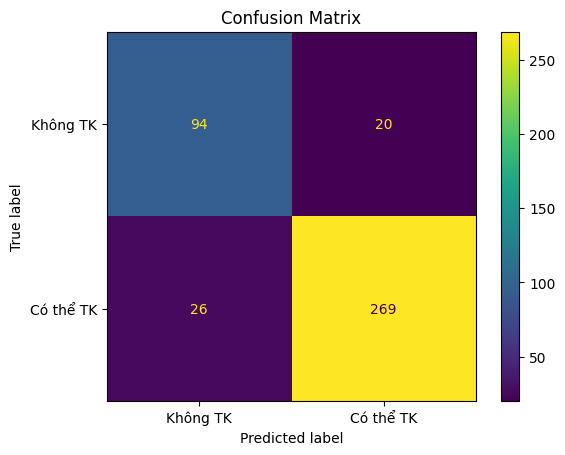

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Không TK', 'Có thể TK'])
plt.title("Confusion Matrix")
plt.show()


# Cross-Validation

In [42]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
import pandas as pd
import numpy as np

# 1. Khởi tạo mô hình
model = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# 2. Thiết lập Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 3. Lưu các độ đo
recall_scores = []
precision_scores = []
f1_scores = []
roc_auc_scores = []

# 4. Lặp qua từng fold
for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train_fold, y_train_fold)
    y_pred_fold = model.predict(X_test_fold)
    y_proba_fold = model.predict_proba(X_test_fold)[:, 1]

    recall_scores.append(recall_score(y_test_fold, y_pred_fold))
    precision_scores.append(precision_score(y_test_fold, y_pred_fold))
    f1_scores.append(f1_score(y_test_fold, y_pred_fold))
    roc_auc_scores.append(roc_auc_score(y_test_fold, y_proba_fold))

# 5. Tạo bảng kết quả
results_df = pd.DataFrame({
    "Metric": ["Recall", "Precision", "F1-score", "ROC-AUC"],
    "Mean": [
        np.mean(recall_scores),
        np.mean(precision_scores),
        np.mean(f1_scores),
        np.mean(roc_auc_scores)
    ],
    "Std": [
        np.std(recall_scores),
        np.std(precision_scores),
        np.std(f1_scores),
        np.std(roc_auc_scores)
    ]
})

# 6. Làm tròn và hiển thị
results_df["Mean"] = results_df["Mean"].round(3)
results_df["Std"] = results_df["Std"].round(3)

print("=== Cross-Validation Metrics (Stratified 5-Fold) ===")
print(results_df)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:11:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:11:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:11:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=== Cross-Validation Metrics (Stratified 5-Fold) ===
      Metric   Mean    Std
0     Recall  0.895  0.030
1  Precision  0.886  0.033
2   F1-score  0.890  0.015
3    ROC-AUC  0.903  0.015


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:11:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:11:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# KẾT LUẬN